In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Amazon Sale Report.csv")
df

/tmp/ipykernel_25243/689126336.py:6: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [116]:
df_l = df[["Category", "currency", "Amount", "ship-city"]].copy()
df_l

,Category,currency,Amount,ship-city
0,Set,INR,647.62,MUMBAI
1,kurta,INR,406.00,BENGALURU
2,kurta,INR,329.00,NAVI MUMBAI
3,Western Dress,INR,753.33,PUDUCHERRY
4,Top,INR,574.00,CHENNAI
...,...,...,...,...
128970,kurta,INR,517.00,HYDERABAD
128971,Set,INR,999.00,GURUGRAM
128972,Western Dress,INR,690.00,HYDERABAD
128973,Set,INR,1199.00,Halol


In [117]:
df_l.dropna(how='any', inplace=True)
df_l.isnull().sum()

Category     0
currency     0
Amount       0
ship-city    0
dtype: int64

In [118]:
dfResultado = df_l.groupby(["Category", "ship-city"])["Amount"].mean()
dfResultado

Category  ship-city    
Blouse    ADALAJ           493.000000
          ADOOR            419.000000
          AGRA             416.666667
          AHMED NAGAR      301.000000
          AHMEDABAD        524.222222
                              ...    
kurta     vikarabad        568.000000
          visakhapatnam    421.000000
          vizianagaram     469.000000
          warangal         399.000000
          west bengal      335.000000
Name: Amount, Length: 14783, dtype: float64

In [119]:
dfResul = dfResultado.reset_index()
dfResul

,Category,ship-city,Amount
0,Blouse,ADALAJ,493.000000
1,Blouse,ADOOR,419.000000
2,Blouse,AGRA,416.666667
3,Blouse,AHMED NAGAR,301.000000
4,Blouse,AHMEDABAD,524.222222
...,...,...,...
14778,kurta,vikarabad,568.000000
14779,kurta,visakhapatnam,421.000000
14780,kurta,vizianagaram,469.000000
14781,kurta,warangal,399.000000


In [120]:
print(dfResul["Category"].unique())

['Blouse' 'Bottom' 'Dupatta' 'Ethnic Dress' 'Saree' 'Set' 'Top'
 'Western Dress' 'kurta']


In [121]:
col = dfResul["Category"].unique()
col
print("- Dataframe creados -")
for a in col:
    nombre_df = a.replace(" ", "_").replace("-", "_").replace("/", "_").replace("&", "_") 
    globals()[nombre_df] = dfResul[dfResul["Category"] == a][["Category", "ship-city", "Amount"]].sort_values("Amount", ascending=False).head(15).copy()
    print(nombre_df)

- Dataframe creados -
Blouse
Bottom
Dupatta
Ethnic_Dress
Saree
Set
Top
Western_Dress
kurta


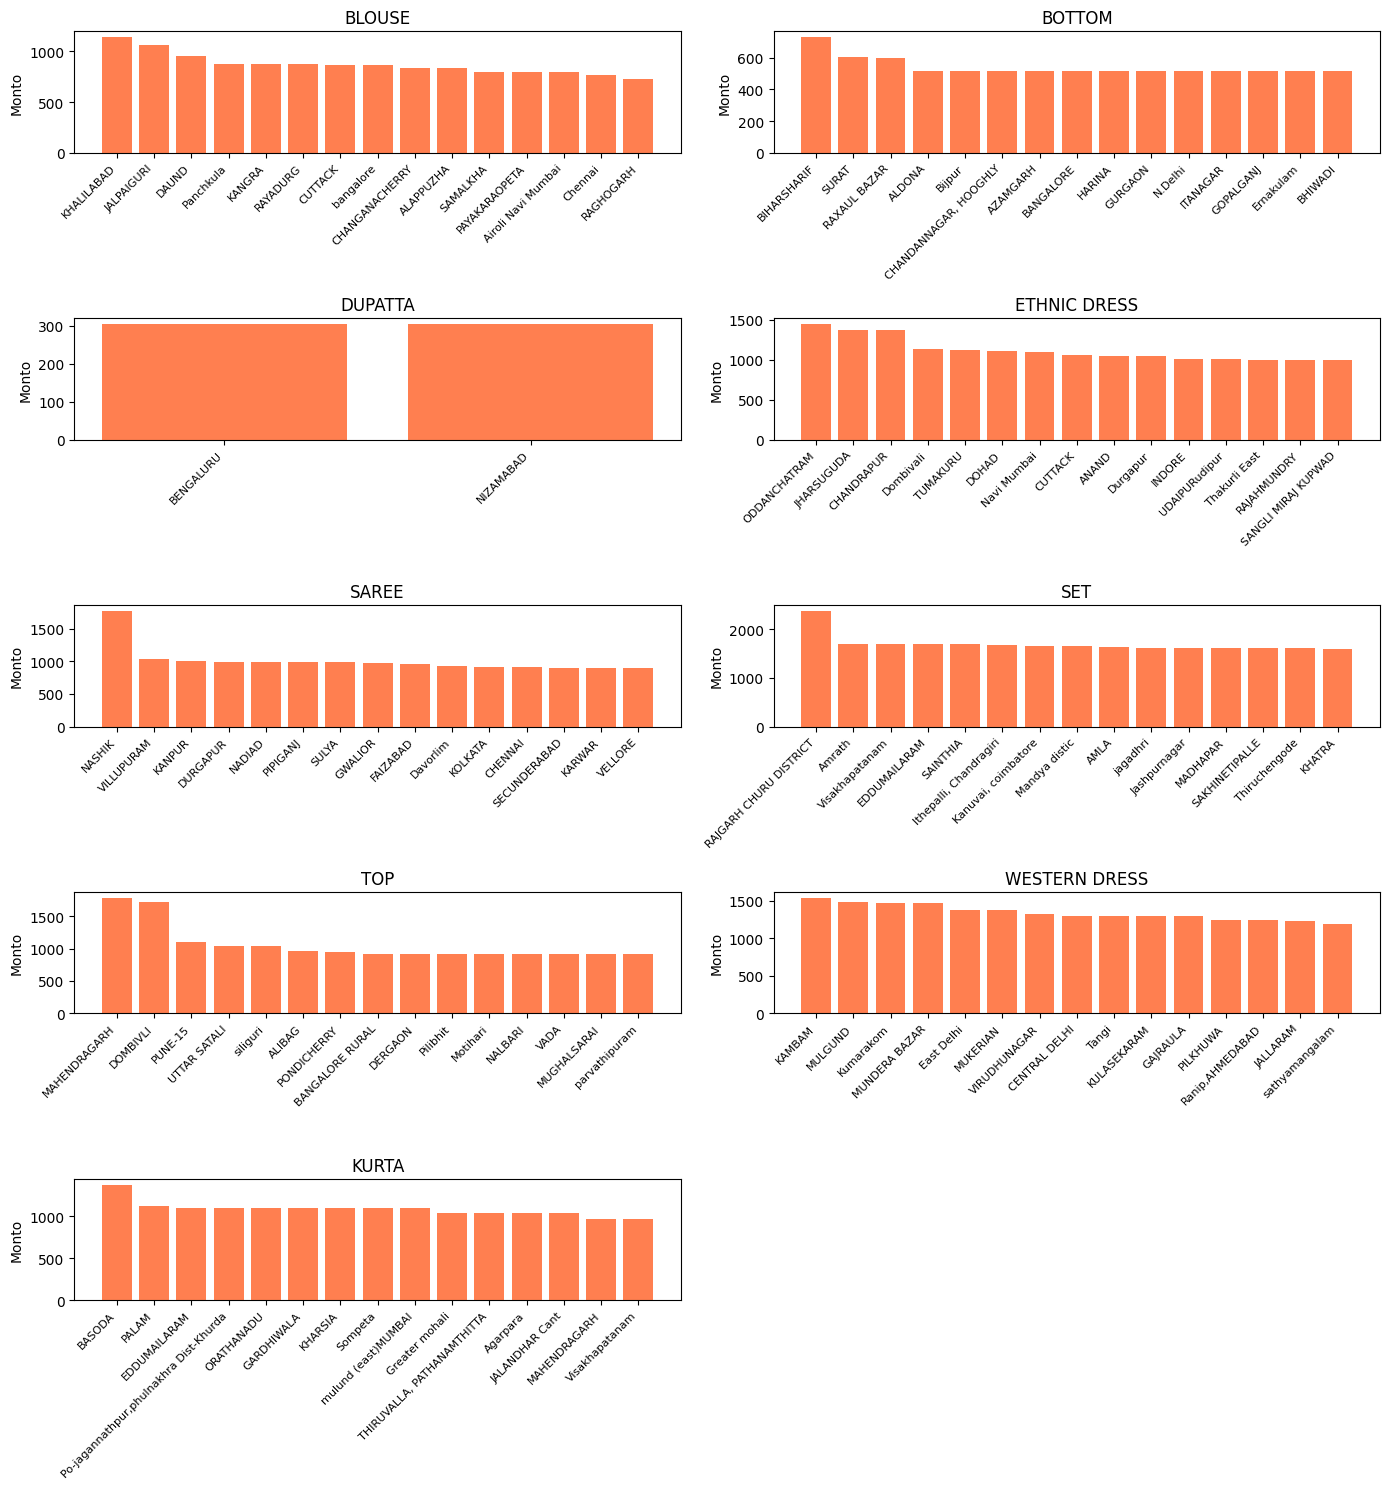

In [130]:
# 1. Cambiamos a (5, 2) porque tienes 9 categorías. Con (4, 2) solo tienes espacio para 8.
fig, axes = plt.subplots(5, 2, figsize=(14, 15))

# Bloque 0
axes[0,0].bar(range(len(Blouse)), Blouse["Amount"], color='coral')
axes[0,0].set_title('BLOUSE')
#axes[0,0].set_xlabel('Ciudad de envio')
axes[0,0].set_xticks(range(len(Blouse)))   
axes[0,0].set_xticklabels(Blouse["ship-city"], rotation=45, fontsize=8, ha='right')
axes[0,0].set_ylabel('Monto')

axes[0,1].bar(range(len(Bottom)), Bottom["Amount"], color='coral')
axes[0,1].set_title('BOTTOM')
#axes[0,1].set_xlabel('Ciudad de envio')
axes[0,1].set_xticks(range(len(Bottom)))   
axes[0,1].set_xticklabels(Bottom["ship-city"], rotation=45, fontsize=8, ha='right')
axes[0,1].set_ylabel('Monto')

# Bloque 1
axes[1,0].bar(range(len(Dupatta)), Dupatta["Amount"], color='coral')
axes[1,0].set_title('DUPATTA')
#axes[1,0].set_xlabel('Ciudad de envio')
axes[1,0].set_xticks(range(len(Dupatta)))   
axes[1,0].set_xticklabels(Dupatta["ship-city"], rotation=45, fontsize=8, ha='right')
axes[1,0].set_ylabel('Monto')

axes[1,1].bar(range(len(Ethnic_Dress)), Ethnic_Dress["Amount"], color='coral')
axes[1,1].set_title('ETHNIC DRESS')
#axes[1,1].set_xlabel('Ciudad de envio')
axes[1,1].set_xticks(range(len(Ethnic_Dress)))   
axes[1,1].set_xticklabels(Ethnic_Dress["ship-city"], rotation=45, fontsize=8, ha='right')
axes[1,1].set_ylabel('Monto')

# Bloque 2
axes[2,0].bar(range(len(Saree)), Saree["Amount"], color='coral')
axes[2,0].set_title('SAREE')
#axes[2,0].set_xlabel('Ciudad de envio')
axes[2,0].set_xticks(range(len(Saree)))   
axes[2,0].set_xticklabels(Saree["ship-city"], rotation=45, fontsize=8, ha='right')
axes[2,0].set_ylabel('Monto')

axes[2,1].bar(range(len(Set)), Set["Amount"], color='coral')
axes[2,1].set_title('SET')
#axes[2,1].set_xlabel('Ciudad de envio')
axes[2,1].set_xticks(range(len(Set)))   
axes[2,1].set_xticklabels(Set["ship-city"], rotation=45, fontsize=8, ha='right')
axes[2,1].set_ylabel('Monto')

# Bloque 3 - CORREGIDO: Se usa [3, 0] y [3, 1] con coma, no con punto.
axes[3, 0].bar(range(len(Top)), Top["Amount"], color='coral')
axes[3, 0].set_title('TOP')
#axes[3, 0].set_xlabel('Ciudad de envio')
axes[3, 0].set_xticks(range(len(Top)))   
axes[3, 0].set_xticklabels(Top["ship-city"], rotation=45, fontsize=8, ha='right')
axes[3, 0].set_ylabel('Monto')

axes[3, 1].bar(range(len(Western_Dress)), Western_Dress["Amount"], color='coral')
axes[3, 1].set_title('WESTERN DRESS')
#axes[3, 1].set_xlabel('Ciudad de envio')
axes[3, 1].set_xticks(range(len(Western_Dress)))   
axes[3, 1].set_xticklabels(Western_Dress["ship-city"], rotation=45, fontsize=8, ha='right')
axes[3, 1].set_ylabel('Monto')

# Bloque 4 - CORREGIDO: Ahora existe porque definimos subplots(5, 2)
axes[4, 0].bar(range(len(kurta)), kurta["Amount"], color='coral')
axes[4, 0].set_title('KURTA')
#axes[4, 0].set_xlabel('Ciudad de envio')
axes[4, 0].set_xticks(range(len(kurta)))   
axes[4, 0].set_xticklabels(kurta["ship-city"], rotation=45, fontsize=8, ha='right')
axes[4, 0].set_ylabel('Monto')


fig.delaxes(axes[4,1])
plt.tight_layout()
plt.show()

Se estima cuales son las ciudades mas caras por prenda, espera distinguir cuales son los envios mas caros por prenda.